# Intro to Argovis' GO-SHIP API

Argovis indexes a subset of CCHDO's GO-SHIP data. In this notebook, we tour basic search and colocation options for this dataset.

> **This is a beta product!**
> Argovis' new API is currently undergoing heavy development. Therefore, everything in these notebooks should be understood as a technical preview only; implementation details may change before a 
stable release is made. Please send feedback and ideas to argovis@colorado.edu, and see the API docs as they evolve at https://argovis-api.colorado.edu/docs/.

## Setup

In addition to importing a few python packages and declaring a couple of helper functions, make sure to plug in your Argovis API key for `API_KEY` at the bottom of the next cell. If you don't have a free Argovis API key yet, get one at https://argovis-keygen.colorado.edu/.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import datetime, time, json, requests, pprint, copy

def polygon_lon_lat(polygon_str):
    # polygon_str: string value of polygon search parameter, ie "[[lon0,lat0],[lon1,lat1],...,[lon0,lat0]]"
    # convert the polygon shape to lon and lat and save in a dictionary
    polygon_lon_lat_dict = {'lon': [float(i) for i in ((polygon_str.replace('[','')).replace(']','')).split(',')[0::2]], \
                    'lat': [float(i) for i in ((polygon_str.replace('[','')).replace(']','')).split(',')[1::2]]
                   }
    return polygon_lon_lat_dict

def simple_map(longitudes, latitudes, z=None, polygon=None, title='', fig=None, figIndex=None, marker=None, secondaries=None):
    if fig:
        ax = fig.add_subplot(figIndex[0], figIndex[1], figIndex[2], projection=ccrs.LambertConformal(cutoff=-60))
    else:
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(cutoff=-60))
    gl = ax.gridlines(draw_labels=True,color='black')
    if z:
        s = ax.scatter(longitudes, latitudes, c=z, transform=ccrs.PlateCarree())
        plt.colorbar(s, pad=0.1)
    else:
        s = ax.scatter(longitudes, latitudes,transform=ccrs.PlateCarree())
    
    if polygon:
        plt.plot(polygon_lon_lat(polygon)['lon'],polygon_lon_lat(polygon)['lat'],'-k',transform=ccrs.PlateCarree()) 
    if marker:
        plt.plot(marker[0],marker[1],'Xr', transform=ccrs.PlateCarree(), markersize=20)
    if secondaries:
        for sec in secondaries:
            ax.scatter(sec['lon'], sec['lat'],transform=ccrs.PlateCarree(), color='red', marker='x', s=100)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    plt.title(title, fontdict={'fontsize':20})

API_KEY=''
API_ROOT='https://argovis-api.colorado.edu'

## Finding Available WOCE Lines & Cruises

In order to browse what cruises and WOCE lines Argovis has available for GO-SHIP, we provide a vocabulary route that summarizes what's available in the database:

In [2]:
vocab_params = {
    "parameter": "woceline" # could also be "cchdo_cruise"
}

wocelines = requests.get(API_ROOT+'/goship/vocabulary', params=vocab_params, headers={'x-argokey': API_KEY}).json()

In [3]:
wocelines

[None,
 '160W',
 '40N',
 '75N',
 'A01',
 'A01E',
 'A02',
 'A05',
 'A08',
 'A09',
 'A09.5',
 'A095',
 'A10',
 'A11',
 'A12',
 'A13',
 'A13.5',
 'A14',
 'A15/AR15',
 'A16C',
 'A16N',
 'A16N/AR21',
 'A16S',
 'A17',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A9.5',
 'AAIW05',
 'ACT2010',
 'AJAX',
 'ANAS1',
 'ANAS2',
 'ANAS3',
 'ANAS4',
 'ANAS7',
 'AO-01',
 'AO94',
 'AO95',
 'AR01',
 'AR02',
 'AR03',
 'AR04',
 'AR04EW',
 'AR07',
 'AR07E',
 'AR07E/AR25',
 'AR07W',
 'AR07W/AR13',
 'AR08',
 'AR09',
 'AR10',
 'AR11',
 'AR12',
 'AR13',
 'AR15',
 'AR16',
 'AR18',
 'AR19',
 'AR21',
 'AR24',
 'AR25',
 'AR28',
 'ARK-II_3',
 'ARK-IV_3',
 'ARS01',
 'ATAS1',
 'AWS02I',
 'Albatross',
 'CBL',
 'CLMD2',
 'CLMD5',
 'DIMES UK1',
 'DIMES UK2',
 'DIMES UK4',
 'DIMES US1',
 'DIMES US2',
 'Drake Passage',
 'HLY0201',
 'I01E',
 'I01W',
 'I02',
 'I02W',
 'I03',
 'I04/I05W/I07C',
 'I05',
 'I05P',
 'I07',
 'I07N',
 'I09N',
 'I10',
 'IR01W',
 'IR01W/IR03',
 'IR03',
 'IR04',
 'IR06',
 'ISS01',
 'ISS02',
 'ISS03',
 'JO

We can then download all the data from a given WOCE line:

In [4]:
goship_params = {
    "woceline": "A10" # or anything from the list above
}

goship = requests.get(API_ROOT+'/goship', params=goship_params, headers={'x-argokey': API_KEY}).json()
goship[0]

{'_id': 'expo_49NZ20031106_sta_622_cast_001',
 'metadata': '1116_m0',
 'geolocation': {'coordinates': [-47.3898, -27.7318], 'type': 'Point'},
 'basin': 1,
 'timestamp': '2003-11-07T11:02:00.000Z',
 'source': [{'data_keys_source': ['pressure',
    'sample',
    'ctd_temperature',
    'ctd_temperature_qc',
    'ctd_salinity',
    'ctd_salinity_qc',
    'ctd_oxygen',
    'ctd_oxygen_qc'],
   'data_source_standard_names': {'latitude': 'latitude',
    'longitude': 'longitude',
    'time': 'time',
    'btm_depth': 'sea_floor_depth_below_sea_surface',
    'pressure': 'sea_water_pressure',
    'ctd_temperature': 'sea_water_temperature',
    'ctd_temperature_qc': 'status_flag',
    'ctd_salinity': 'sea_water_practical_salinity',
    'ctd_salinity_qc': 'status_flag',
    'ctd_oxygen': 'moles_of_oxygen_per_unit_mass_in_sea_water',
    'ctd_oxygen_qc': 'status_flag'},
   'data_source_reference_scale': {'ctd_temperature': 'ITS-90',
    'ctd_salinity': 'PSS-78'},
   'data_source_units': {'latitude':

Much of the metadata for GO-SHIP documents live in their own collection, referenced by the `metadata` key in each of the above hits. We can look this metadata up using the appropriate route:

In [5]:
goship_metadata = {
    "id": goship[0]['metadata']
}

goship_meta = requests.get(API_ROOT+'/goship/meta', params=goship_metadata, headers={'x-argokey': API_KEY}).json()
goship_meta

[{'_id': '1116_m0',
  'date_updated_argovis': '2022-07-19T17:31:39.588Z',
  'data_type': 'oceanicProfile',
  'country': '49',
  'data_center': 'CCHDO',
  'instrument': 'ship_ctd',
  'pi_name': ['Yasushi Yoshikawa'],
  'expocode': '49NZ20031106',
  'woce_lines': ['A10'],
  'cchdo_cruise_id': 1116}]

Note that the metadata pointer, in this case `1116_m0`, encodes the CCHDO cruise ID as its first token, 1116 in this case. We can get the measurements for this WOCE line and cruise as follows; this time, let's also ask for the CTD measurement of salinity:

In [6]:
cruise_params = {
    "cchdo_cruise": 1116,
    "woceline": "A10",
    "data": 'psal_ctd'
}

cruise = requests.get(API_ROOT+'/goship', params=cruise_params, headers={'x-argokey': API_KEY}).json()

We can then plot this cruise, colored by surface salinity, as per:

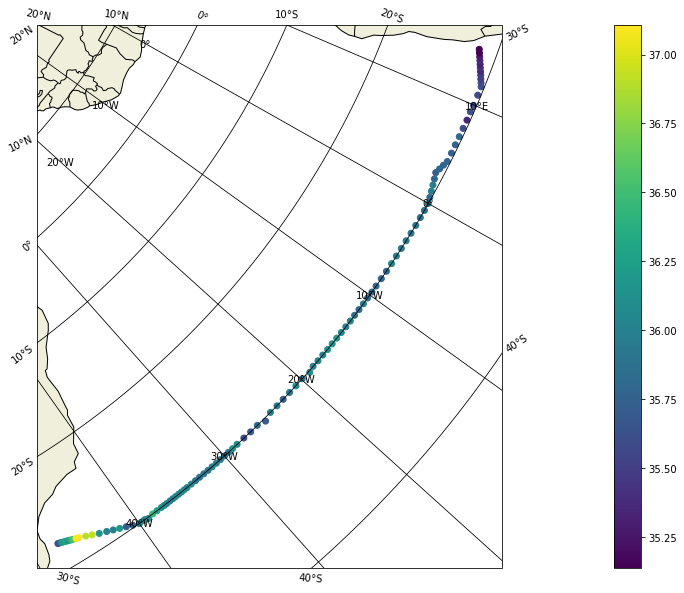

In [7]:
goship_longitudes = [x['geolocation']['coordinates'][0] for x in cruise]
goship_latitudes  = [x['geolocation']['coordinates'][1] for x in cruise]
ctd_psal = [x['data'][0]['psal_ctd'] for x in cruise]

simple_map(goship_longitudes,goship_latitudes,ctd_psal)

## Co-locating with GO-SHIP

Now that we've found some GO-SHIP data of interest, we can go looking for co-located data from other data products indexed by Argovis. To do so, we can loop through every GO-SHIP measurement of interest and see if there are any Global Drifter Program drifters nearby in space and time.

In [8]:
colo_drifters = []
for go_meas in cruise:
    drifter_param = {
        "center": str(go_meas['geolocation']['coordinates'][0]) + ',' + str(go_meas['geolocation']['coordinates'][1]),
        "radius": 50,
        "startDate": (datetime.datetime.strptime(go_meas['timestamp'], "%Y-%m-%dT%H:%M:%S.000Z") + datetime.timedelta(minutes=-90)).strftime("%Y-%m-%dT%H:%M:%SZ"),
        "endDate": (datetime.datetime.strptime(go_meas['timestamp'], "%Y-%m-%dT%H:%M:%S.000Z") + datetime.timedelta(minutes=90)).strftime("%Y-%m-%dT%H:%M:%SZ")
    }

    prox = requests.get(API_ROOT+'/drifters', params=drifter_param, headers={'x-argokey': API_KEY}).json()
    
    if not 'code' in prox:
        colo_drifters.append(prox)
    

We can then extract longitudes and latitudes and mark the co-located drifter measurements along our traversal of A10, red X in the plot:

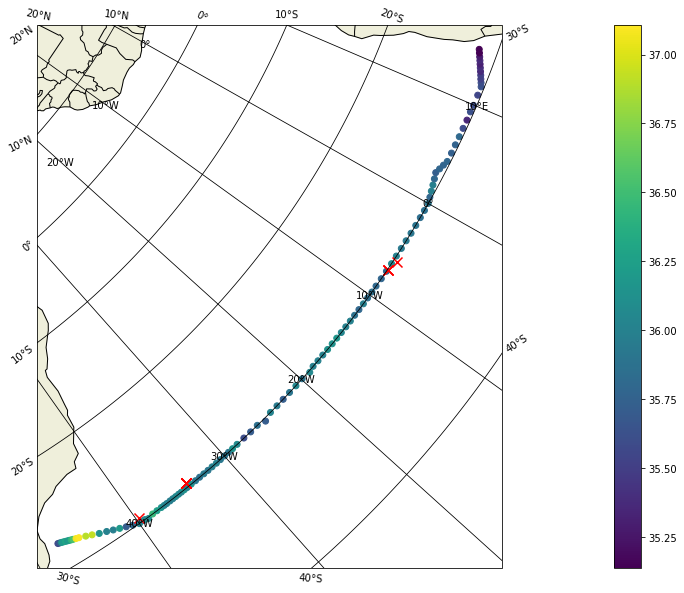

In [9]:
drifter_paths = []
for colo in colo_drifters:
    drifter_paths.append({
        "lon": [x['geolocation']['coordinates'][0] for x in colo],
        "lat": [x['geolocation']['coordinates'][1] for x in colo]
    })
simple_map(goship_longitudes,goship_latitudes,ctd_psal, secondaries=drifter_paths)